In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import scipy.stats as st

pd.options.mode.chained_assignment = None

def fix_names(df):
    return df.rename(columns={
        " comsumption": "consumption", 
        " distance": "distance",
        " volume": "volume",
        " seed": "seed"
    })


<h2>Confidence interval for each test</h2>

In [103]:
tests = [
    "baseline",
    "75volume",
    "50volume",
    "25volume",
    "75frequency",
    "50frequency",
    "25frequency",
    "75vol75freq",
    "50vol50freq",
    "25vol25freq",
]

sample_stats = {
    "baseline": {},
    "75volume": {},
    "50volume": {},
    "25volume": {},
    "75frequency": {},
    "50frequency": {},
    "25frequency": {},
    "75vol75freq": {},
    "50vol50freq": {},
    "25vol25freq": {},
}

for test in tests:
    dir = "sim-data/"+test+"/"

    Y_consumption = []
    Y_distance = []
    Y_lowcon = []


    # Calc stats for each run
    for i in range(1, 6):
        df = fix_names(pd.read_csv(dir+str(i)+".csv"))

        consumptions = df["consumption"].values
        distances = df["distance"].values
        distances = distances[distances > 0] # Removing no travel
        lowcon = len(consumptions[consumptions < 0.17 - (3 * 0.04)]) # If consumption is 3 sd's away from mean

        Y_consumption.append(np.mean(consumptions))
        Y_distance.append(np.mean(distances))
        Y_lowcon.append(lowcon)

    Y_consumption = np.array(Y_consumption)
    Y_distance = np.array(Y_distance)
    Y_lowcon = np.array(Y_lowcon)

    # Calc stats across runs
    consumption_mean = np.mean(Y_consumption)
    consumption_ci = st.t.interval(confidence=0.90, df=len(Y_consumption)-1, 
                                    loc=np.mean(Y_consumption), 
                                    scale=st.sem(Y_consumption))
    consumption_diff = (consumption_ci[1] - consumption_ci[0]) / 2

    distance_mean = np.mean(Y_distance)
    distance_ci = st.t.interval(confidence=0.90, 
                                df=len(Y_distance)-1, 
                                loc=np.mean(Y_distance), 
                                scale=st.sem(Y_distance))
    distance_diff = (distance_ci[1] - distance_ci[0]) / 2
    
    lowcon_mean = np.mean(Y_lowcon)
    lowcon_ci = st.t.interval(confidence=0.90, 
                                df=len(Y_lowcon)-1, 
                                loc=np.mean(Y_lowcon), 
                                scale=st.sem(Y_lowcon))
    lowcon_diff = (lowcon_ci[1] - lowcon_ci[0]) / 2
    

    sample_stats[test]["consumption"] = [consumption_mean, consumption_diff]
    sample_stats[test]["distance"] = [distance_mean, distance_diff]
    sample_stats[test]["lowcon"] = [lowcon_mean, lowcon_diff]

for test, stats in sample_stats.items():
    print("-----", test, "-----")
    for statname, ci in stats.items():
        print(statname, " ", ci) 
    
    print()
        

----- baseline -----
consumption   [0.16935091983180292, 8.530526536545957e-05]
distance   [7.424902943728616, 0.10654238853747255]
lowcon   [1226.4, 123.06979937434801]

----- 75volume -----
consumption   [0.1663249643748861, 0.0010703283554333864]
distance   [8.044805882116076, 0.2451967553272607]
lowcon   [5692.2, 1519.7160127528832]

----- 50volume -----
consumption   [0.14675022604406468, 0.005638332381538158]
distance   [8.683945136638517, 0.18898893903102199]
lowcon   [34092.8, 8226.198652322124]

----- 25volume -----
consumption   [0.08202096318446002, 0.0034761389155159444]
distance   [8.84429582703543, 0.03754467394896466]
lowcon   [128754.2, 4971.17622603754]

----- 75frequency -----
consumption   [0.16572253013336216, 0.0018461894919794275]
distance   [7.924480940488269, 0.14361164062821263]
lowcon   [6555.0, 2715.8608500589626]

----- 50frequency -----
consumption   [0.14241507620609312, 0.005015919276940062]
distance   [8.48871069860009, 0.14235099181255606]
lowcon   [406

<h2>Varying volume plots</h2>

In [104]:
def plot_confidence_interval(x, interval, color='#2187bb', horizontal_line_width=0.25):
    left = x - horizontal_line_width / 2
    top = interval[0] - interval[1]
    right = x + horizontal_line_width / 2
    bottom = interval[0] + interval[1]
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, interval[0], 'o', color='#f44336')

stat_names = ["consumption", "distance", "lowcon"]
titles = ["Consumption", "Distance", "Low Consumption"]
units = ["(kg)", "(km)", "(count)"]

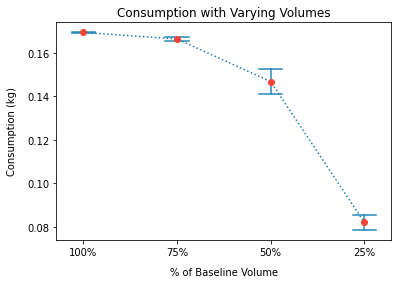

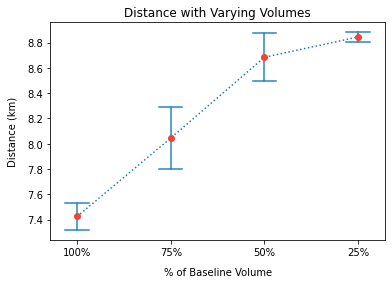

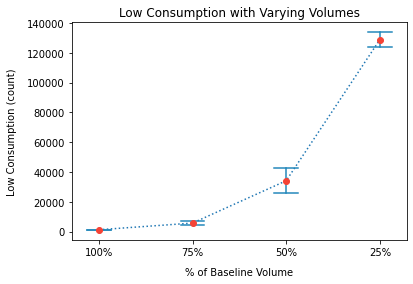

In [ ]:

for stat, title, unit in zip(stat_names, titles, units):
    plt.xticks([1, 2, 3, 4], ['100%', '75%', '50%', '25%'])
    plt.title(title + " with Varying Volumes")

    line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75volume"][stat][0],
        sample_stats["50volume"][stat][0],
        sample_stats["25volume"][stat][0],
    ]
    plt.plot([1, 2, 3, 4], line, linestyle = 'dotted')

    plot_confidence_interval(1, sample_stats["baseline"][stat])
    plot_confidence_interval(2, sample_stats["75volume"][stat])
    plot_confidence_interval(3, sample_stats["50volume"][stat])
    plot_confidence_interval(4, sample_stats["25volume"][stat])

    plt.xlabel("% of Baseline Volume", labelpad=10)
    plt.ylabel(title + " " + unit, labelpad=10)

    plt.savefig("figures/volume/"+stat+".png", dpi=300, bbox_inches='tight')

    plt.show()

<h2>Varying frequency plots</h2>

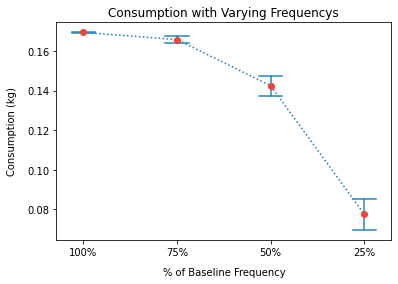

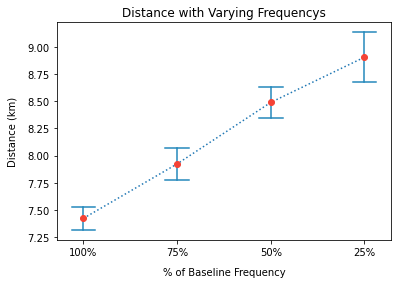

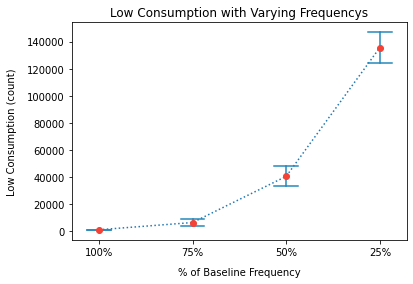

In [106]:
for stat, title, unit in zip(stat_names, titles, units):
    plt.xticks([1, 2, 3, 4], ['100%', '75%', '50%', '25%'])
    plt.title(title + " with Varying Frequencys")

    line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75frequency"][stat][0],
        sample_stats["50frequency"][stat][0],
        sample_stats["25frequency"][stat][0],
    ]
    plt.plot([1, 2, 3, 4], line, linestyle = 'dotted')

    plot_confidence_interval(1, sample_stats["baseline"][stat])
    plot_confidence_interval(2, sample_stats["75frequency"][stat])
    plot_confidence_interval(3, sample_stats["50frequency"][stat])
    plot_confidence_interval(4, sample_stats["25frequency"][stat])

    plt.xlabel("% of Baseline Frequency", labelpad=10)
    plt.ylabel(title + " " + unit, labelpad=10)

    plt.savefig("figures/frequency/"+stat+".png", dpi=300)

    plt.show()

<h2>Varying volume and frequency plots</h2>

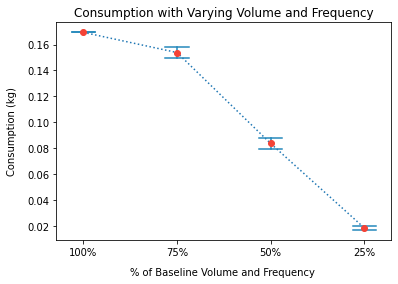

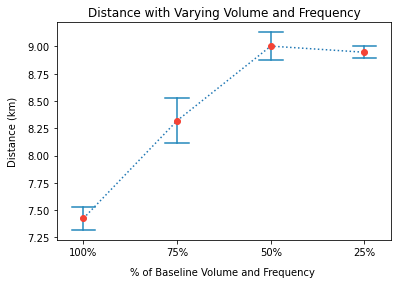

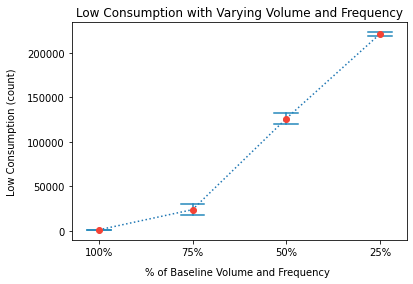

In [107]:
for stat, title, unit in zip(stat_names, titles, units):
    plt.xticks([1, 2, 3, 4], ['100%', '75%', '50%', '25%'])
    plt.title(title + " with Varying Volume and Frequency")

    line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75vol75freq"][stat][0],
        sample_stats["50vol50freq"][stat][0],
        sample_stats["25vol25freq"][stat][0],
    ]
    plt.plot([1, 2, 3, 4], line, linestyle = 'dotted')

    plot_confidence_interval(1, sample_stats["baseline"][stat])
    plot_confidence_interval(2, sample_stats["75vol75freq"][stat])
    plot_confidence_interval(3, sample_stats["50vol50freq"][stat])
    plot_confidence_interval(4, sample_stats["25vol25freq"][stat])

    plt.xlabel("% of Baseline Volume and Frequency ", labelpad=10)
    plt.ylabel(title + " " + unit, labelpad=10)

    plt.savefig("figures/volfreq/"+stat+".png", dpi=300)

    plt.show()

<h2>Comparing scenarios<h2>

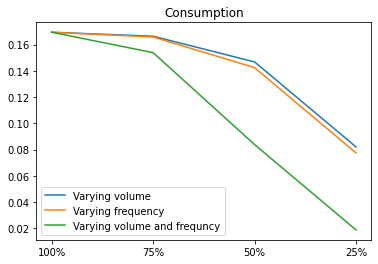

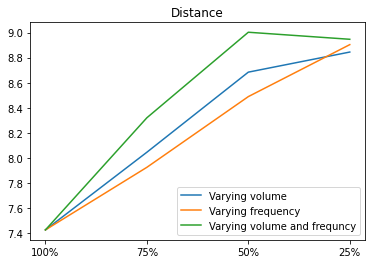

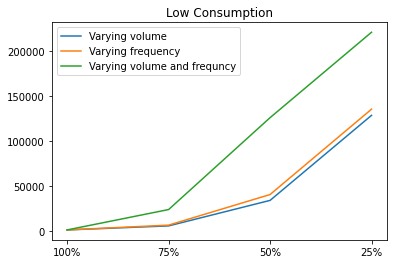

In [108]:
for stat, title, unit in zip(stat_names, titles, units):
    plt.xticks([1, 2, 3, 4], ['100%', '75%', '50%', '25%'])
    plt.title(title)

    vol_line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75volume"][stat][0],
        sample_stats["50volume"][stat][0],
        sample_stats["25volume"][stat][0],
    ]

    freq_line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75frequency"][stat][0],
        sample_stats["50frequency"][stat][0],
        sample_stats["25frequency"][stat][0],
    ]

    volfreq_line = [
        sample_stats["baseline"][stat][0],
        sample_stats["75vol75freq"][stat][0],
        sample_stats["50vol50freq"][stat][0],
        sample_stats["25vol25freq"][stat][0],
    ]

    plt.plot([1, 2, 3, 4], vol_line, label="Varying volume")
    plt.plot([1, 2, 3, 4], freq_line, label="Varying frequency")
    plt.plot([1, 2, 3, 4], volfreq_line, label="Varying volume and frequncy")
    plt.legend()

    plt.savefig("figures/compare/"+stat+".png", dpi=300)

    plt.show()